In [24]:
import numpy as np
# from dolfin import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.tri import Triangulation

# Load the matrix and vector from the files
Ak_np = np.load("Ak.npy")
L_np = np.load("L.npy")

# Initial guess (zero vector)
x0 = np.zeros(len(L_np))

# Set tolerance and maximum iterations
tol = 1e-8
max_iter = 1000

In [25]:
# Define the grid for the unit square
n = 20
x_range = np.arange(0, 1 + 1 / n, 1 / n)
y_range = np.arange(0, 1 + 1 / n, 1 / n)
xy = np.array(np.meshgrid(x_range, y_range)).T.reshape(-1, 2)

# Simulate coord_map for mapping solution to mesh (based on finite element DoFs)
# coord_map should be replaced with the actual DoF coordinates from your FEM solver
coord_map = xy.copy()

In [26]:
def conjugate_gradient(A, b, x, tol, max_iter):
    r = b-A@x
    if np.linalg.norm(r) < tol: return x
    p = r.copy()
    r_old = np.transpose(r) @ r

    for k in tqdm(range(max_iter)):
        alpha = r_old / (np.transpose(p)@(A@p))
        x = x + alpha*p
        r = r- alpha*(A@p)

        if np.linalg.norm(r) < tol: return x

        r_new = np.transpose(r)@r
        beta = (r_new)/ (r_old)
        p = r + beta*p
        
        r_old =  r_new
    return x

In [27]:
solution_cg = conjugate_gradient(Ak_np, L_np, x0, tol, max_iter)
# Map the solution to the mesh grid
u_reshaped = np.zeros((n + 1) * (n + 1))

for i, coord in enumerate(coord_map):
    for j, xy_val in enumerate(xy):
        if np.allclose(coord, xy_val):
            u_reshaped[j] = solution_cg[i]

u_reshaped = u_reshaped.reshape(n + 1, n + 1)


100%|██████████| 1000/1000 [01:04<00:00, 15.54it/s]


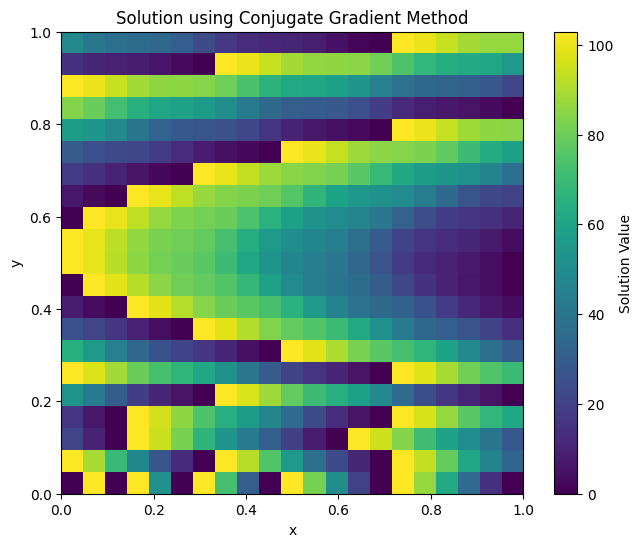

In [28]:
# Plot the solution using imshow
plt.figure(figsize=(8, 6))
plt.imshow(u_reshaped, extent=[0, 1, 0, 1], origin="lower", cmap="viridis")
plt.colorbar(label="Solution Value")
plt.title("Solution using Conjugate Gradient Method")
plt.xlabel("x")
plt.ylabel("y")
plt.show()